# ガウス過程モデル

特徴量$x$から目的変数$y$を予測する関数$f(x)$を確率変数と見立てて、予測の不確実性を含めて複数の関数$f(x)$を学習するモデル


## 例

[1.7. Gaussian Processes — scikit-learn 1.7.1 documentation](https://scikit-learn.org/stable/modules/gaussian_process.html)

/usr/local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


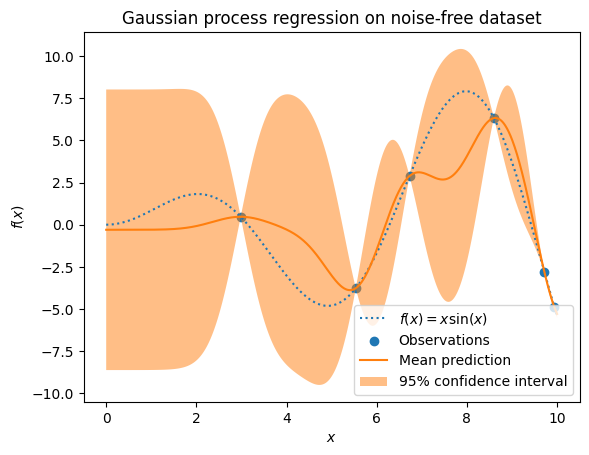

In [7]:
# ガウス過程回帰（Gaussian Process Regression, GPR）の例

# 1) データを生成
# from sklearn.datasets import make_regression
# X, y = make_regression(n_samples=80, n_features=1, noise=12.0, random_state=42)
import numpy as np
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))


rng = np.random.RandomState(0)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

# 2) ガウス過程のカーネル設定
# カーネルは Constant * RBF + WhiteKernel（典型的な選択）
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
         + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-5, 1e1))

# 3) モデル学習
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True, random_state=42)
gp.fit(X_train, y_train)

# 4) 予測（きれいな曲線を出すため細かいグリッド上で）
import matplotlib.pyplot as plt
X_test = np.linspace(X.min() - 1.0, X.max() + 1.0, 400).reshape(-1, 1)
y_mean, y_std = gp.predict(X_test, return_std=True)
y_upper = y_mean + 1.96 * y_std  # 95%信頼帯
y_lower = y_mean - 1.96 * y_std

# 5) プロット
mean_prediction, std_prediction = gp.predict(X, return_std=True)
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")


## 参考

- [赤穂昭太郎. (2018). ガウス過程回帰の基礎. システム/制御/情報, 62(10), 390-395.](https://www.jstage.jst.go.jp/article/isciesci/62/10/62_390/_pdf)
- 敬文金森. (2018). Pythonで学ぶ統計的機械学習. 株式会社 オーム社.
- [[1807.02582] Gaussian Processes and Kernel Methods: A Review on Connections and Equivalences](https://arxiv.org/abs/1807.02582)
    - 評判の高い解説論文